# COGS 108 - EDA Checkpoint

# Names

- Daniel Lam
- Jacky Dam
- Katherine Lim
- Michael Phung

<a id='research_question'></a>
# Research Question

In the game League of Legends, players select certain characters (champions) to play in team-based matches against an opposing team and try to achieve victory. Given a wide selection of team compositions from past matches and whether or not they won or lost, can we determine a team's probability of winning during the matchmaking process of the game?

# Dataset (s)

- Dataset Name: match_history.csv
- Link to the dataset: https://github.com/COGS108/Group024-Fa21/blob/master/match_history.csv
- Number of observations: 

This dataset is past player data that we extracted using Cassiopeia (https://github.com/meraki-analytics/cassiopeia). It contains information regarding the teams that played each other in past matches as well as the end result of that match. 

# Setup

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Data Cleaning

To understand the data cleaning process, we first need to understand which columns we need from the dataset. We will take a look at what the data looks like, and look for any interesting features.

In [2]:
# Read the CSV file for the player match history. Display a match with all the players.
matches = pd.read_csv("match_history.csv")
matches.head(20)

,match_id,duration,summoner_name,side,team_position,summoner_level,win,champion,kills,deaths,assists,damage_to_turrets,gold_earned,turret_takedowns,vision_score,minions_killed,first_blood,first_tower
0,4098892755,0:00:01.739000,silent express,blue,top_lane,313,True,Heimerdinger,1,5,5,0,10524,0,13,225,False,False
1,4098892755,0:00:01.739000,Aryu,blue,jungle,172,True,Kha'Zix,7,6,13,1746,10126,4,21,13,False,False
2,4098892755,0:00:01.739000,TL Shadow,blue,mid_lane,152,True,Ahri,5,4,9,3588,11163,4,13,166,False,False
3,4098892755,0:00:01.739000,Lystuya,blue,bot_lane,585,True,Xayah,9,3,10,5279,13800,5,20,241,False,False
4,4098892755,0:00:01.739000,031216,blue,utility,173,True,Senna,4,7,17,3319,10918,4,76,49,False,False
5,4098892755,0:00:01.739000,PALl PALI,red,top_lane,55,False,Neeko,5,2,2,17777,15126,7,25,272,False,False
6,4098892755,0:00:01.739000,ceo of supp gap,red,jungle,74,False,Hecarim,5,8,11,221,11549,2,27,52,False,False
7,4098892755,0:00:01.739000,ZhenMingTiänZi,red,mid_lane,121,False,Singed,3,4,6,923,9168,0,17,156,True,False
8,4098892755,0:00:01.739000,ROCKBOOM,red,bot_lane,360,False,Caitlyn,10,6,8,3152,13447,2,30,180,False,False
9,4098892755,0:00:01.739000,The Doggo,red,utility,745,False,Sona,2,6,13,1335,7927,1,42,10,False,False


In [3]:
# Shape of the data set.
matches.shape

(8380, 18)

In [4]:
# Get descriptive statistics for the different variables.
matches.describe()

,match_id,summoner_level,kills,deaths,assists,damage_to_turrets,gold_earned,turret_takedowns,vision_score,minions_killed
count,8.380000e+03,8380.000000,8380.000000,8380.000000,8380.000000,8380.000000,8380.000000,8380.000000,8380.000000,8380.000000
mean,4.094178e+09,306.097971,5.402983,5.419451,8.059666,2596.839379,10572.964797,2.027327,28.174582,114.777208
std,7.930059e+06,178.735285,4.237069,2.935611,5.578891,3096.440118,3494.714289,2.032812,20.830586,78.494436
min,4.031335e+09,33.000000,0.000000,0.000000,0.000000,0.000000,1954.000000,0.000000,0.000000,0.000000
25%,4.093535e+09,156.750000,2.000000,3.000000,4.000000,363.750000,8036.750000,0.000000,15.000000,33.000000
50%,4.097038e+09,294.000000,4.000000,5.000000,7.000000,1559.000000,10311.000000,1.000000,22.000000,128.000000
75%,4.098459e+09,428.000000,8.000000,7.000000,11.000000,3760.250000,12749.000000,3.000000,35.000000,178.000000
max,4.099175e+09,1026.000000,31.000000,17.000000,37.000000,37846.000000,30067.000000,11.000000,195.000000,404.000000


In [5]:
# Column data types.
matches.dtypes

match_id              int64
duration             object
summoner_name        object
side                 object
team_position        object
summoner_level        int64
win                    bool
champion             object
kills                 int64
deaths                int64
assists               int64
damage_to_turrets     int64
gold_earned           int64
turret_takedowns      int64
vision_score          int64
minions_killed        int64
first_blood            bool
first_tower            bool
dtype: object

In [6]:
# list the column values
list(matches)

['match_id',
 'duration',
 'summoner_name',
 'side',
 'team_position',
 'summoner_level',
 'win',
 'champion',
 'kills',
 'deaths',
 'assists',
 'damage_to_turrets',
 'gold_earned',
 'turret_takedowns',
 'vision_score',
 'minions_killed',
 'first_blood',
 'first_tower']

# Interpreting the Data

From the information above, the data set contains the match history of 8380 players, and each match_id contains 10 players meaning that there is a total of 838 games. There are 18 variables for every player...

Looking at the above columns, there are a few variables that are necessary in determining the probability of winning for a given team composition. The following are the variables that we thought would prove helpful:  
- match_id: unique number that correlates to a single match or game.
- champion: the character that the player chose.
- win: the result of a player during a specific match.
- team_position: the 'role' of the player during the match (their position in the match).
- side: the team of each player (red or blue).
- kills/deaths/assists: the score of the player during the specific match (aka KDA), statistic that shows how well the player performed during the match.

We decided to remove the following columns:
- duration: the total game duration.
- summoner_name: unique name of the player.
- summoner_level: the overall level of the given player (does not relate to the match).
- damage_to_turrets: the amount of damage done to the enemy base (typically does not affect win/loss).
- turret_takedowns: the number of turrets a player destroyed (was the last source of damage to the tower in destroying it).
- gold_earned: amount of gold earned by the player during the match by killing minions, destorying turrets, or securing objectives.
- vision_score: vision score is given based on how many wards they placed down or enemy wards that they destroyed. a ward is an item used by players to reveal the locations of the enemy team.
- minions_killed: also known as creep score, a number that determines how many neutral/enemy minions were neutralized by the player. killing minions award the player with gold.
- first_blood: a statistic awarded to the player who was the first to takedown an enemy player.
- first_tower: a statistic awarded to the player who was the first to takedown an enemy turret.

In [7]:
# Remove the unwanted columns from the dataset.
matches.drop(['summoner_name', 'summoner_level', 'damage_to_turrets', 'gold_earned', 'vision_score', 
              'minions_killed', 'first_blood', 'first_tower', 'turret_takedowns'], axis = 'columns', 
              inplace = True)

In [8]:
# Display the dataset with only the columns we want to work with.
matches.head(10)

,match_id,duration,side,team_position,win,champion,kills,deaths,assists
0,4098892755,0:00:01.739000,blue,top_lane,True,Heimerdinger,1,5,5
1,4098892755,0:00:01.739000,blue,jungle,True,Kha'Zix,7,6,13
2,4098892755,0:00:01.739000,blue,mid_lane,True,Ahri,5,4,9
3,4098892755,0:00:01.739000,blue,bot_lane,True,Xayah,9,3,10
4,4098892755,0:00:01.739000,blue,utility,True,Senna,4,7,17
5,4098892755,0:00:01.739000,red,top_lane,False,Neeko,5,2,2
6,4098892755,0:00:01.739000,red,jungle,False,Hecarim,5,8,11
7,4098892755,0:00:01.739000,red,mid_lane,False,Singed,3,4,6
8,4098892755,0:00:01.739000,red,bot_lane,False,Caitlyn,10,6,8
9,4098892755,0:00:01.739000,red,utility,False,Sona,2,6,13


In [9]:
# Check the shape of our new dataset, and check if there exist any missing entries.
print(matches.shape)
matches.isna().any()

(8380, 9)


match_id         False
duration         False
side             False
team_position    False
win              False
champion         False
kills            False
deaths           False
assists          False
dtype: bool

Now we want to check whether every match_id only has only 10 players. Any match_id with more than 10 player represents a duplicate match entry which we want to remove. 

In [10]:
# Check if there's any duplicate matches (match_ids w/ more than 10 players)
matches['match_id'].value_counts()

4098958151    90
4098934352    80
4098892755    60
4096009721    40
4096082204    40
              ..
4096298953    10
4096304943    10
4095108927    10
4095064931    10
4085600194    10
Name: match_id, Length: 762, dtype: int64

In [11]:
# Drop any duplicate matches that appear more than once
matches = matches.drop_duplicates()

In [12]:
# Show that we removed duplicate matches (match_ids only have 10 players each)
matches['match_id'].value_counts()

4098892755    10
4097017406    10
4095971826    10
4094832514    10
4092334366    10
              ..
4095268117    10
4095282034    10
4099006792    10
4099000113    10
4085600194    10
Name: match_id, Length: 762, dtype: int64

Now our dataset only contains 762 unique match_ids which all has 10 players each.

# Processing the data for our predictive model
We want to parse through every match, derive the blue team composition and red team composition in order to feed our machine learning model.

In [13]:
match_ids = []
blue_comp = [] 
red_comp = []
win_comp = []
lose_comp = []

# After cleaning our data, every 10 iterations represents a unique match with 10 players.
for i in range(0, len(matches), 10):
    blue_temp = []
    red_temp = []
    win_temp = []
    lose_temp = []
    
    # Record the match_id.
    match_ids.append(matches.iloc[i]['match_id'])
    
    # Parse the first 5 players in the match representing the blue team, extract their team composition into an array representing whether they won/lost.
    for j in range(0, 5):
        blue_temp.append(matches.iloc[int(i + j)]['champion'])
        if matches.iloc[int(i + j)]['win']:
            win_temp.append(matches.iloc[int(i + j)]['champion'])
        else:
            lose_temp.append(matches.iloc[int(i + j)]['champion'])
    # Parse the last 5 players in the match representing the red team, extract their team composition into an array representing whether they won/lost.
    for j in range(5, 10):
        red_temp.append(matches.iloc[int(i + j)]['champion'])
        if matches.iloc[int(i + j)]['win']:
            win_temp.append(matches.iloc[int(i + j)]['champion'])
        else:
            lose_temp.append(matches.iloc[int(i + j)]['champion'])
        
    blue_comp.append(blue_temp)
    red_comp.append(red_temp)
    win_comp.append(win_temp)
    lose_comp.append(lose_temp)

# Display the team compositions for the first match
print("Match ID: " + str(match_ids[0]))
print("Red Team Composition: " + str(red_comp[0]))
print("Blue Team Composition: " + str(blue_comp[0]))

Match ID: 4098892755
Red Team Composition: ['Neeko', 'Hecarim', 'Singed', 'Caitlyn', 'Sona']
Blue Team Composition: ['Heimerdinger', "Kha'Zix", 'Ahri', 'Xayah', 'Senna']


### Data Analysis & Results (EDA)

In [14]:
# Remove duplicate champions, team_positions which appear more than once.
df = matches[["champion", "team_position"]].drop_duplicates()
df.head()

,champion,team_position
0,Heimerdinger,top_lane
1,Kha'Zix,jungle
2,Ahri,mid_lane
3,Xayah,bot_lane
4,Senna,utility


In [15]:
# Calculate the number of games won, lost for each champion in their respective role
win_df = matches[matches["win"]==True].groupby(["champion", "team_position"]).count().drop(columns=["match_id", "duration", "side", "kills", "deaths", "assists"])
lose_df = matches[matches["win"]==False].groupby(["champion", "team_position"]).count().rename(columns={"win":"lose"}).drop(columns=["match_id", "duration", "side", "kills", "deaths", "assists"])

In [16]:
# Merge the number of games won, lost for each champion in their respective role
df = df.merge(win_df, left_on=["champion", "team_position"], right_on=["champion", "team_position"])
df = df.merge(lose_df, left_on=["champion", "team_position"], right_on=["champion", "team_position"])

In [17]:
# Create a column for the total games played for each champion in their respective role
df["games_played"] = df["win"]+df["lose"]

In [18]:
# Calculate the win rate for each champion in their respective role
df["win_rate"] = df["win"]/df["games_played"]

In [19]:
# Sort the data frame by the most picked champions
df = df.sort_values(by="games_played", ascending=False)

In [20]:
# Reset the indicies, and display the data frame.
# The indicies are now ranked by the total number of games played.
df = df.reset_index(drop=True)
df.head()

,champion,team_position,win,lose,games_played,win_rate
0,Jhin,bot_lane,87,101,188,0.462766
1,Miss Fortune,bot_lane,69,77,146,0.472603
2,Ezreal,bot_lane,65,61,126,0.515873
3,Xayah,bot_lane,60,66,126,0.476190
4,Caitlyn,bot_lane,72,44,116,0.620690


Barplots of the win rate for top 10 most popular champion per role.

<AxesSubplot:xlabel='win_rate', ylabel='champion'>

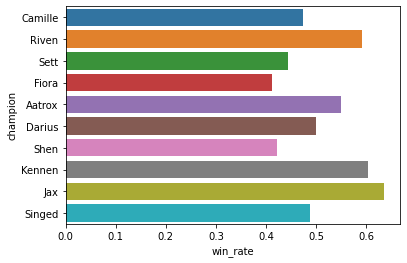

In [21]:
sns.barplot(x="win_rate", y="champion", data=df[df["team_position"]=="top_lane"][:10])

Looking at this barplot which represents the win rates for the top 10 most popular champions picked in the top lane, we can see that there is some champions picked in the top lane has more success in winning the games than others. Additionally, we can see that champions such as Fiora, Shen, Sett have an average win rate of about 40% while champions such as Kennen, and Jax have an average win rate of about 60%.

<AxesSubplot:xlabel='win_rate', ylabel='champion'>

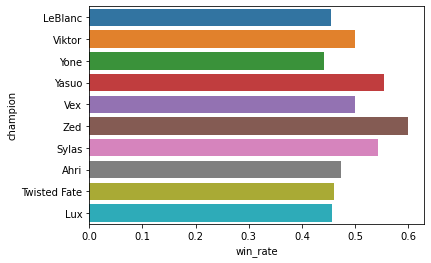

In [22]:
sns.barplot(x="win_rate", y="champion", data=df[df["team_position"]=="mid_lane"][:10])

Looking at this barplot which represents the win rates for the top 10 most popular champions picked in the mid lane, we can see that the win rates of most of the popular mid laners are below 50% with Zed having the highest win rate of about 60%.

<AxesSubplot:xlabel='win_rate', ylabel='champion'>

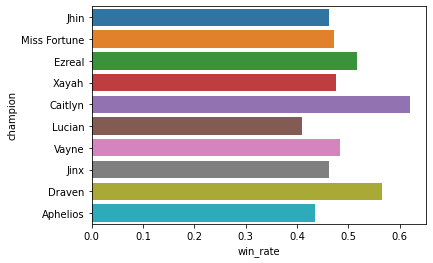

In [23]:
sns.barplot(x="win_rate", y="champion", data=df[df["team_position"]=="bot_lane"][:10])

Looking at this barplot which represents the win rates for the top 10 most popular champions picked in the bot lane, we can see a similar trend to the win rates of the top 10 most popular champions picked in the mid lane with most of the champions having less than 50% win rate. We can also see that Caitlyn has the highest win rate of about 60%.

<AxesSubplot:xlabel='win_rate', ylabel='champion'>

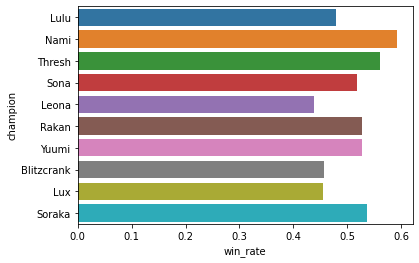

In [24]:
sns.barplot(x="win_rate", y="champion", data=df[df["team_position"]=="utility"][:10])

Looking at this barplot which represents the win rates for the top 10 most popular support (utility) champions. Unlike the other barplots that we've seen, most of the most popular support champions have above 50% win rate.

<AxesSubplot:xlabel='win_rate', ylabel='champion'>

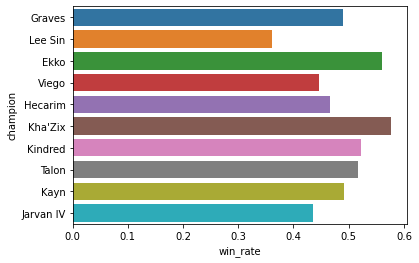

In [25]:
sns.barplot(x="win_rate", y="champion", data=df[df["team_position"]=="jungle"][:10])

Looking at this barplot which represents the win rates for the top 10 most popular champions picked in the jungle, we can see a similar trend to the other barplots with the unique trait of Lee Sin having the lowest win rate (~33%) despite being fairly popular. This is an interesting feature which could possibly be explained by Lee Sin being a popular pick among players who are unfamiliar in the jungle.

In [26]:
# Check out the statistics for top 10 most popular support champions.
df[df["team_position"]=="utility"][:10]

,champion,team_position,win,lose,games_played,win_rate
5,Lulu,utility,55,60,115,0.478261
10,Nami,utility,55,38,93,0.591398
13,Thresh,utility,51,40,91,0.560440
17,Sona,utility,43,40,83,0.518072
18,Leona,utility,36,46,82,0.439024
22,Rakan,utility,39,35,74,0.527027
24,Yuumi,utility,38,34,72,0.527778
26,Blitzcrank,utility,32,38,70,0.457143
28,Lux,utility,30,36,66,0.454545
41,Soraka,utility,30,26,56,0.535714


In [27]:
# Check out the statistics for top 10 most popular champions.
df[df["games_played"]>50][:10]

,champion,team_position,win,lose,games_played,win_rate
0,Jhin,bot_lane,87,101,188,0.462766
1,Miss Fortune,bot_lane,69,77,146,0.472603
2,Ezreal,bot_lane,65,61,126,0.515873
3,Xayah,bot_lane,60,66,126,0.476190
4,Caitlyn,bot_lane,72,44,116,0.620690
5,Lulu,utility,55,60,115,0.478261
6,Camille,top_lane,54,60,114,0.473684
7,Lucian,bot_lane,45,65,110,0.409091
8,Graves,jungle,52,54,106,0.490566
9,Lee Sin,jungle,35,62,97,0.360825


From this table, we can see that the most commonly picked champions are typically bot lane champions.